About

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on working place and maintain requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

1) Problem statement.
OFLC gives job certification applications for employers seeking to bring foreign workers into the United States and grants certifications.
As In last year the count of employees were huge so OFLC needs Machine learning models to shortlist visa applicants based on their previous data.
In this project we are going to use the data given to build a Classification model:

This model is to check if Visa get approved or not based on the given dataset.
This can be used to Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the certain criteria which influences the decision.


2) Data Collection.
The Dataset is part of Office of Foreign Labor Certification (OFLC)
The data consists of 25480 Rows and 12 Columns
https://www.kaggle.com/datasets/moro23/easyvisa-dataset

Importing data and required packages

In [79]:
!pip install seaborn 
!pip install matplotlib
!pip install scipy



     ---------------------------------------- 0.0/59.0 kB ? eta -:--:--
     ------ --------------------------------- 10.2/59.0 kB ? eta -:--:--
     ------ --------------------------------- 10.2/59.0 kB ? eta -:--:--
     ------ --------------------------------- 10.2/59.0 kB ? eta -:--:--
     ------ --------------------------------- 10.2/59.0 kB ? eta -:--:--
     ------ --------------------------------- 10.2/59.0 kB ? eta -:--:--
     ------ --------------------------------- 10.2/59.0 kB ? eta -:--:--
     -------------------------------- ----- 51.2/59.0 kB 145.8 kB/s eta 0:00:01
     -------------------------------------- 59.0/59.0 kB 148.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/42.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/42.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/42.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/42.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/42

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [24]:
df=pd.read_csv("EasyVisa.csv")

In [25]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [26]:
df.shape

(25480, 12)

In [27]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


SEPARATING NUMERICAL AND CATEGORICAL VARIABLES

In [31]:
df_cat=[features for features in df.columns if df[features].dtype=="O" ]

In [32]:
df_cat

['case_id',
 'continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position',
 'case_status']

In [33]:
df_num=[features for features in df.columns if df[features].dtype!="O" ]

In [34]:
df_num

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

In [36]:
print(f"we have {len(df_num)} numerical columns .They are {df_num}")
print(f"we have {len(df_cat)} categorical columns .They are {df_cat}")

we have 3 numerical columns .They are ['no_of_employees', 'yr_of_estab', 'prevailing_wage']
we have 9 categorical columns .They are ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [39]:
for col in df.columns:
 print(df[col].value_counts())
 print('*****************************')

case_id
EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: count, Length: 25480, dtype: int64
*****************************
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
*****************************
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
*****************************
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
*****************************
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
*****************************
no_of_employees
183      18
854      16
724      16
766      15
1476     15
         ..
5876      1
5536      1
47866     1
4700      1
40224     1
Name: count, Length: 7105, dtype: int64
*****

why variable analysis:
1. To understand the distribution of the data(skewness and kurtosis)
2. To understand the correlation between the variables

3.Identify Outliers

4.create report

5.Summary Statistics: Compute summary statistics to get an overview of the variable's distribution. Common summary statistics include:

Measures of Central Tendency: Mean, Median, Mode
Measures of Dispersion: Range, Variance, Standard Deviation
Percentiles (e.g., quartiles, deciles)

6.visulatization

In [40]:
df.dtypes

case_id                   object
continent                 object
education_of_employee     object
has_job_experience        object
requires_job_training     object
no_of_employees            int64
yr_of_estab                int64
region_of_employment      object
prevailing_wage          float64
unit_of_wage              object
full_time_position        object
case_status               object
dtype: object

numerical feature analysis

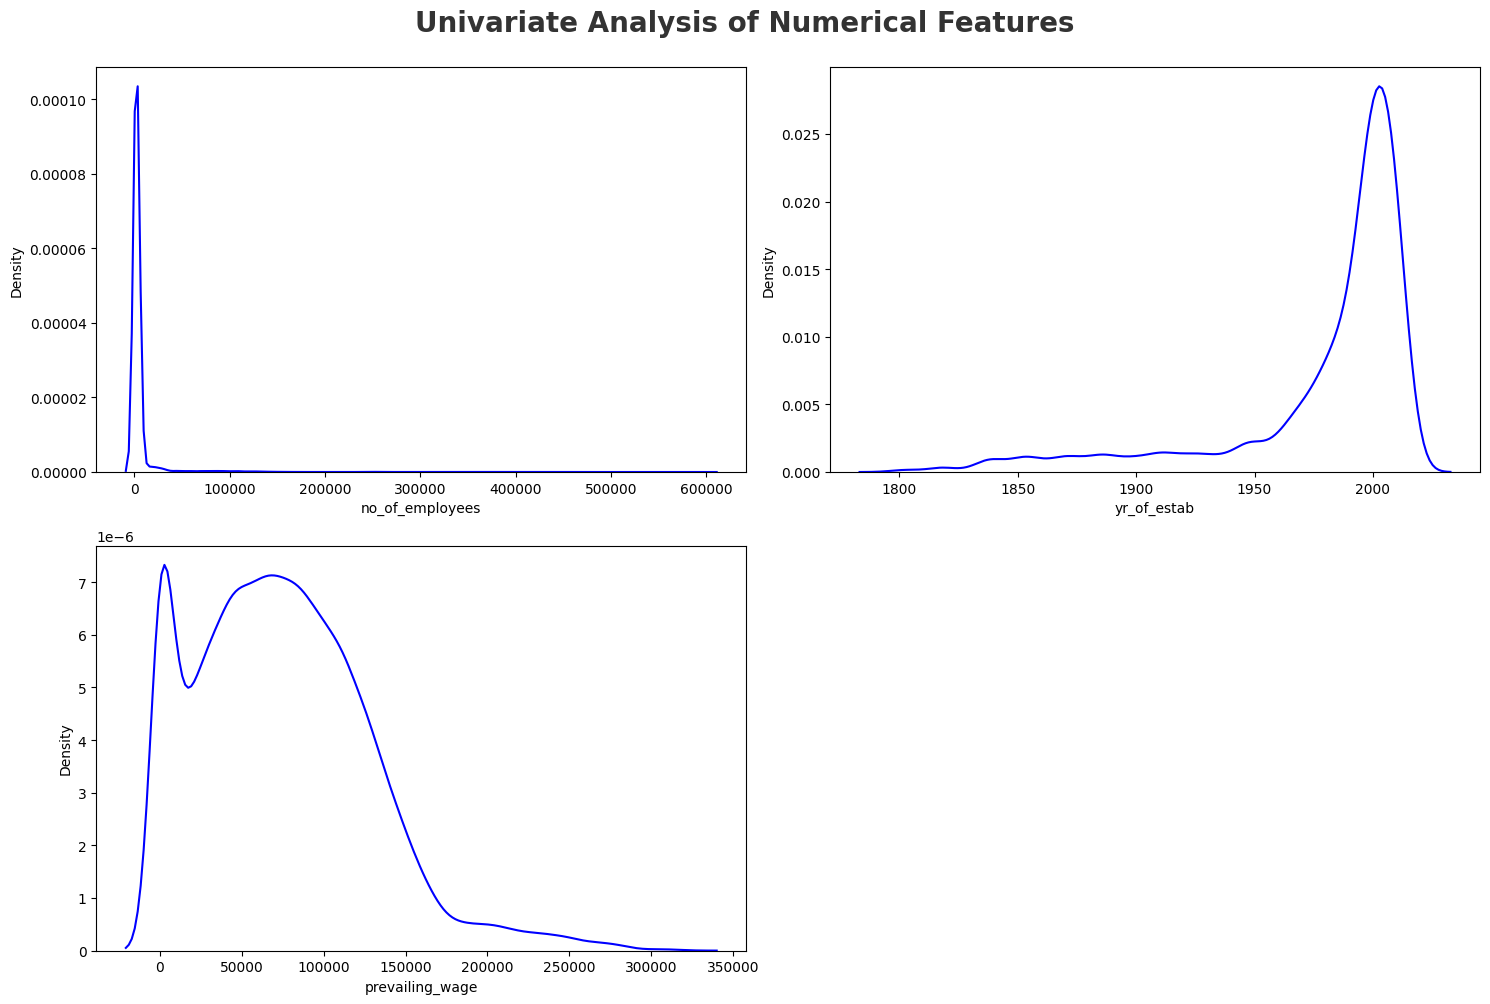

In [55]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(df_num)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df[df_num[i]], color='blue')
    # Adjust layout to prevent overlap
    plt.xlabel(df_num[i])
    plt.tight_layout()
    

    
    

categorical variable analysis

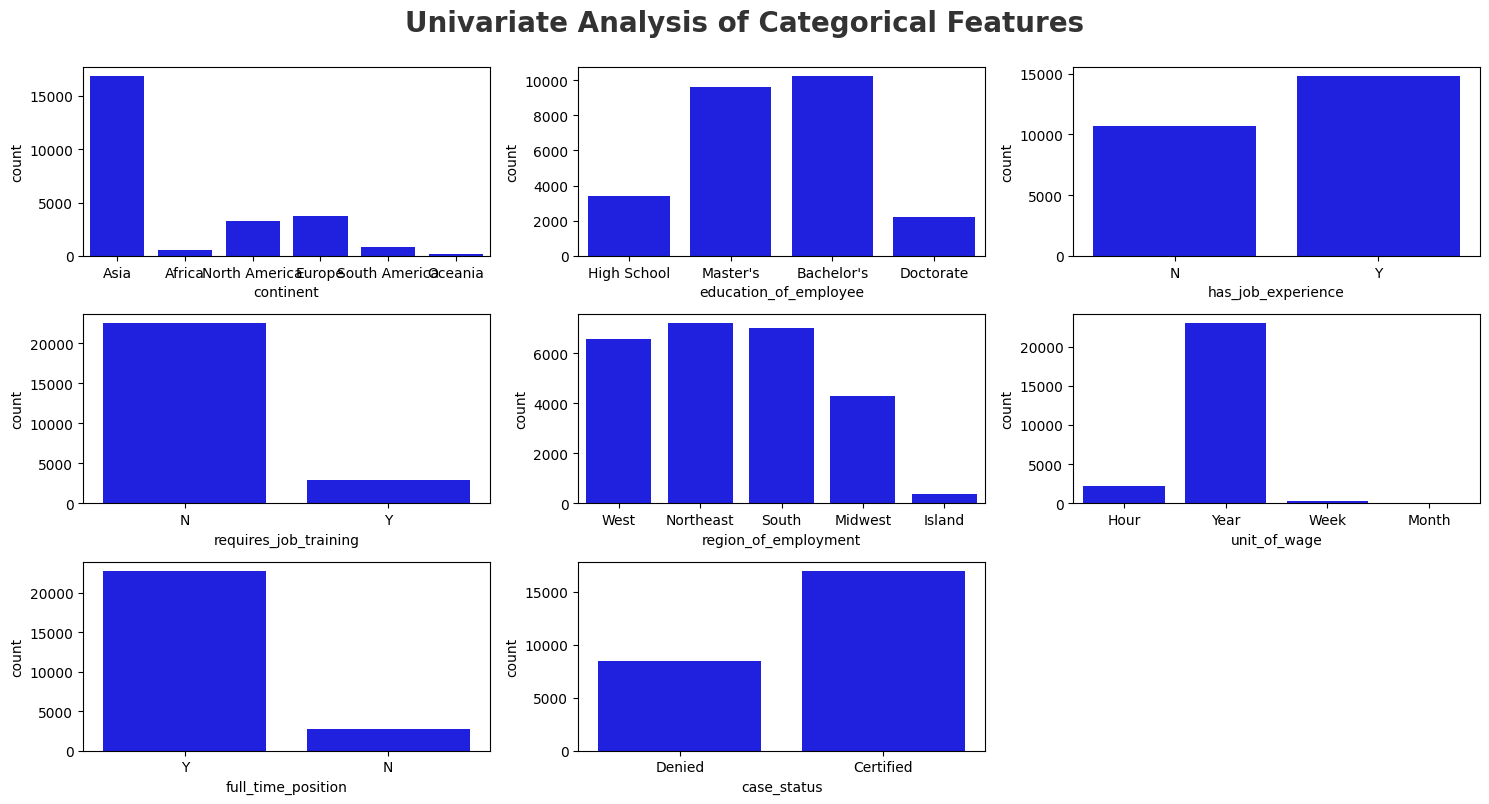

In [64]:
plt.figure(figsize=(15, 8))
#df_cat.remove('case_id')
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(df_cat)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df[df_cat[i]], color='blue')
    # Adjust layout to prevent overlap
    plt.xlabel(df_cat[i])
    plt.tight_layout()
    


In [61]:
df_cat

['continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position',
 'case_status']

seprarate continous and discrete variable

In [75]:
df_discrete=[features for features in df_num if len(df[features].unique())<=25]
#in general, continuous variables tend to have more unique values than discrete variables.
df_continous=[features for features in df_num if len(df[features].unique())>25]

In [76]:
print(f'the discrete variable are{df_discrete}')
print(f'the continous variable are{df_continous}')

the discrete variable are[]
the continous variable are['no_of_employees', 'yr_of_estab', 'prevailing_wage']


Check Multicollinearity in Numerical features


In [78]:
df[df_continous].corr()

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


report:

1. There is no multicollinearity in the num dataset.

Check Multicollinearity for Categorical features


1.A chi-square statistic is one way to show a relationship between two categorical variables.



2.Here we test correlation of Categorical columns with Target column i.e case_status



Null Hypothesis (
): The Feature is independent of target column (No-Correlation)

Alternative Hypothesis (
): The Feature and Target column are not independent (Correalted)

then we need features which are correlated with target variable

In [87]:
from scipy.stats import chi2_contingency
chi2_test=[]
for features in df_cat:
    
    # Create a contingency table
    #pd.crosstab(data['Variable1'], data['Variable2']
    table=pd.crosstab(df['case_status'],df[features])
    if chi2_contingency(table)[1]<0.05:
        chi2_test.append("REJECT THE NULL HYPOTHESIS")
    else:
        chi2_test.append("REJECT THE alternate HYPOTHESIS")    

In [90]:
tab=pd.crosstab(df['case_status'],df[features])
# Perform chi-square test of independence
chi2, p_value, dof, expected = chi2_contingency(tab)

# Print the results
print("Chi-square statistic:", chi2)#[0]
print("P-value:", p_value)#[1]
print("Degrees of freedom:", dof)#[3]
print("Expected frequencies:")
print(expected)

Chi-square statistic: 25475.491852719628
P-value: 0.0
Degrees of freedom: 1
Expected frequencies:
[[11366.26075353  5651.73924647]
 [ 5651.73924647  2810.26075353]]


In [96]:
result=pd.DataFrame(data=[df_cat,chi2_test]   ).T
result.columns = ['Column', 'Hypothesis Result']

result

,Column,Hypothesis Result
0,continent,REJECT THE NULL HYPOTHESIS
1,education_of_employee,REJECT THE NULL HYPOTHESIS
2,has_job_experience,REJECT THE NULL HYPOTHESIS
3,requires_job_training,REJECT THE alternate HYPOTHESIS
4,region_of_employment,REJECT THE NULL HYPOTHESIS
5,unit_of_wage,REJECT THE NULL HYPOTHESIS
6,full_time_position,REJECT THE NULL HYPOTHESIS
7,case_status,REJECT THE NULL HYPOTHESIS


Report

Here requires_job_training fails to Rejects Null Hypothesis which means it doesn't correlate with target column.

Checking Null Values


In [99]:
df.isnull().sum()



case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [101]:
continues_features=[feature for feature in df_num if len(df[feature].unique())>=10]
print('Num of continues features :',continues_features)


Num of continues features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


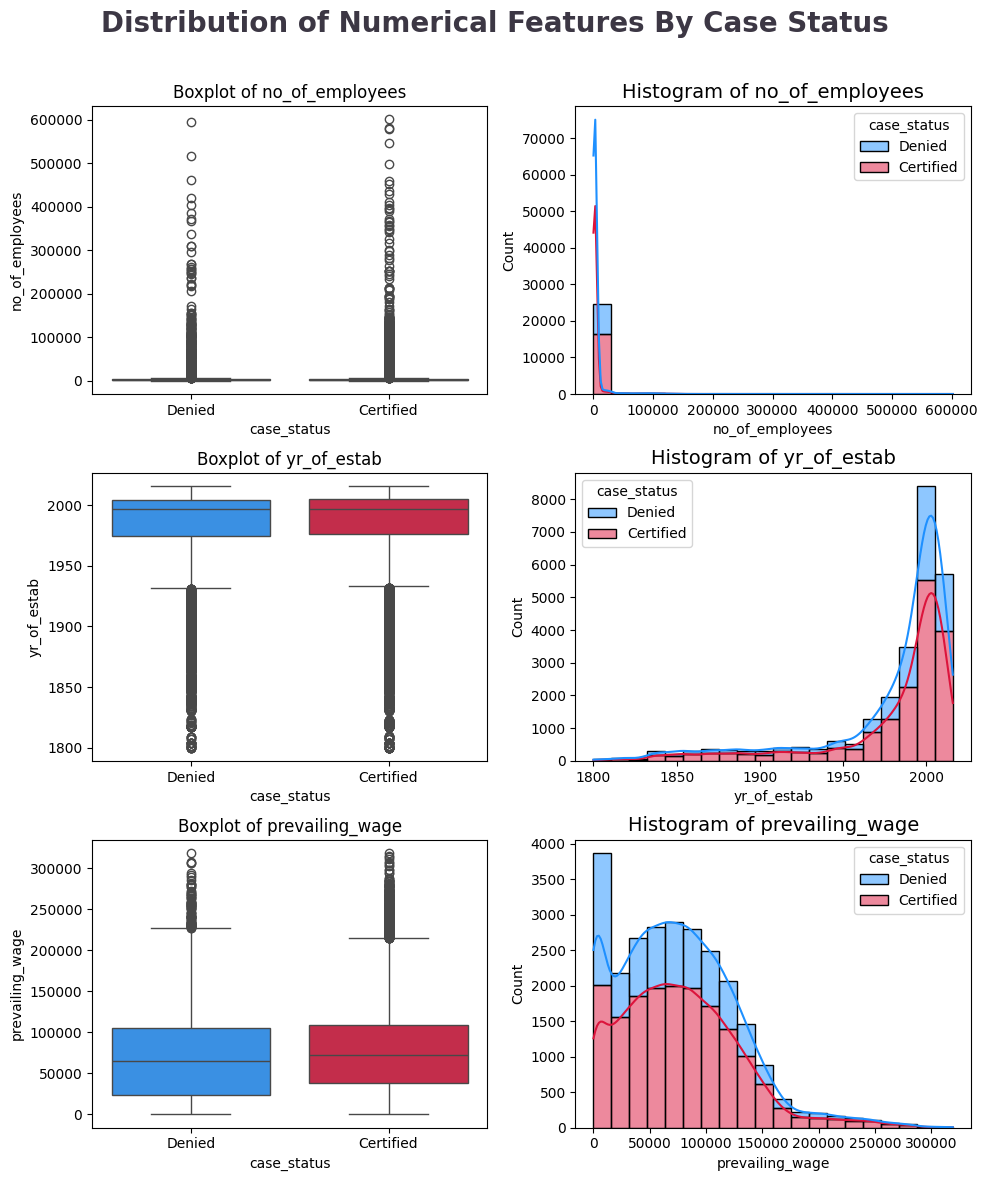

In [106]:
clr1 = ['#1E90FF', '#DC143C']
fig, ax = plt.subplots(3, 2, figsize=(10,12))
fig.suptitle('Distribution of Numerical Features By Case Status', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')
for i, col in enumerate(continues_features):   
    sns.boxplot(data=df, x='case_status', y=col,  palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df, x=col, hue='case_status', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)

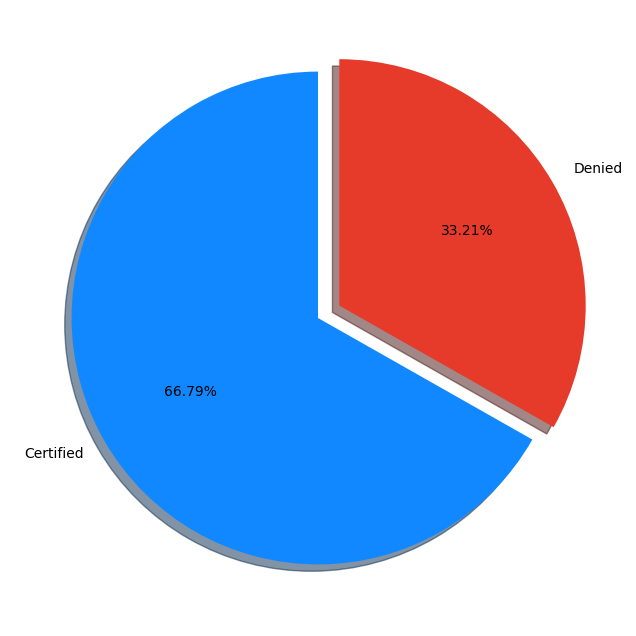

In [114]:
percentage = df.case_status.value_counts(normalize=True)*100
labels = ["Certified","Denied"]

# Plot PieChart with Ploty library
fig, ax = plt.subplots(figsize =(15, 8))
explode = (0, 0.1)
colors = ['#1188ff','#e63a2a']
ax.pie(percentage, labels = labels, startangle = 90,
       autopct='%1.2f%%',explode=explode, shadow=True, colors=colors)
plt.show()

<Axes: xlabel='prevailing_wage', ylabel='Count'>

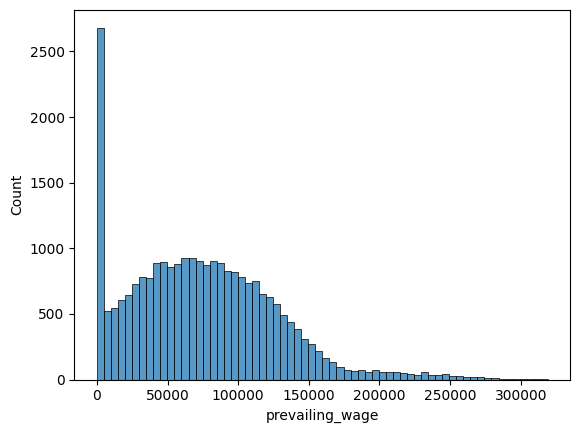

In [119]:
#group data by continent and their count of case_status
df.groupby('continent')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
continent     case_status            
Africa        Certified     72.050817
              Denied        27.949183
Asia          Certified     65.310480
              Denied        34.689520
Europe        Certified     79.233655
              Denied        20.766345
North America Certified     61.877278
              Denied        38.122722
Oceania       Certified     63.541667
              Denied        36.458333
South America Certified     57.863850
              Denied        42.136150

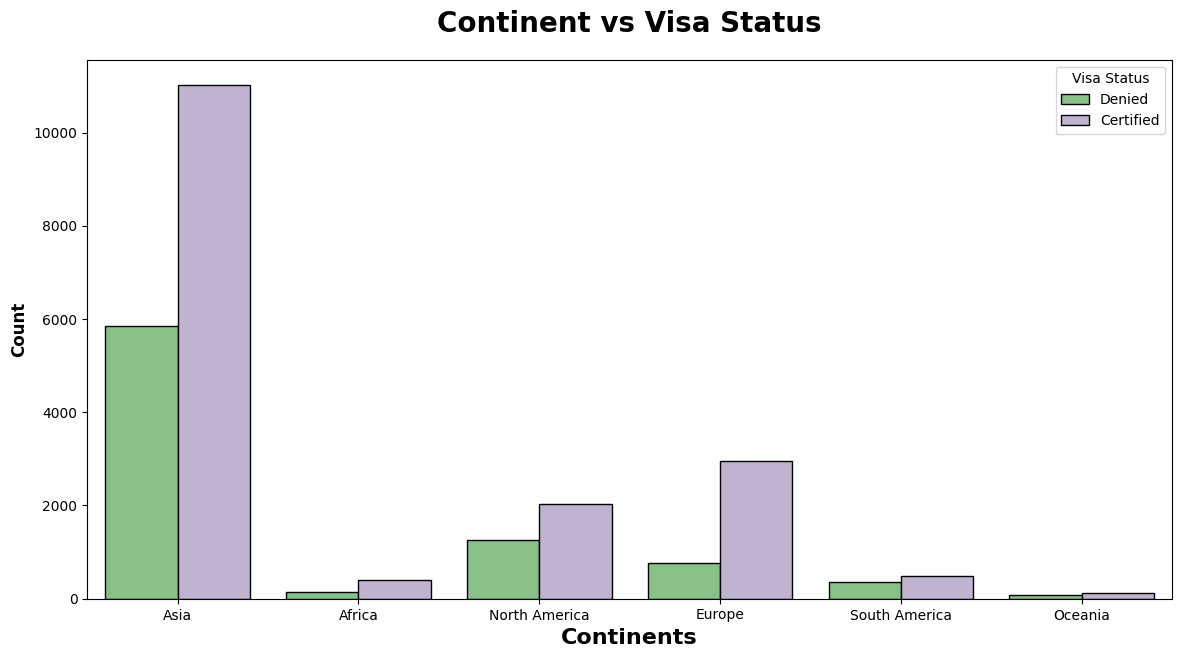

In [120]:
plt.subplots(figsize=(14,7))
sns.countplot(x="continent",hue="case_status", data=df, ec = "black",palette="Accent")
plt.title("Continent vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Continents", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

In [121]:
df.groupby('education_of_employee')['case_status'].value_counts(normalize=True).to_frame()*100


proportion
education_of_employee case_status            
Bachelor's            Certified     62.214188
                      Denied        37.785812
Doctorate             Certified     87.226277
                      Denied        12.773723
High School           Denied        65.964912
                      Certified     34.035088
Master's              Certified     78.627777
                      Denied        21.372223

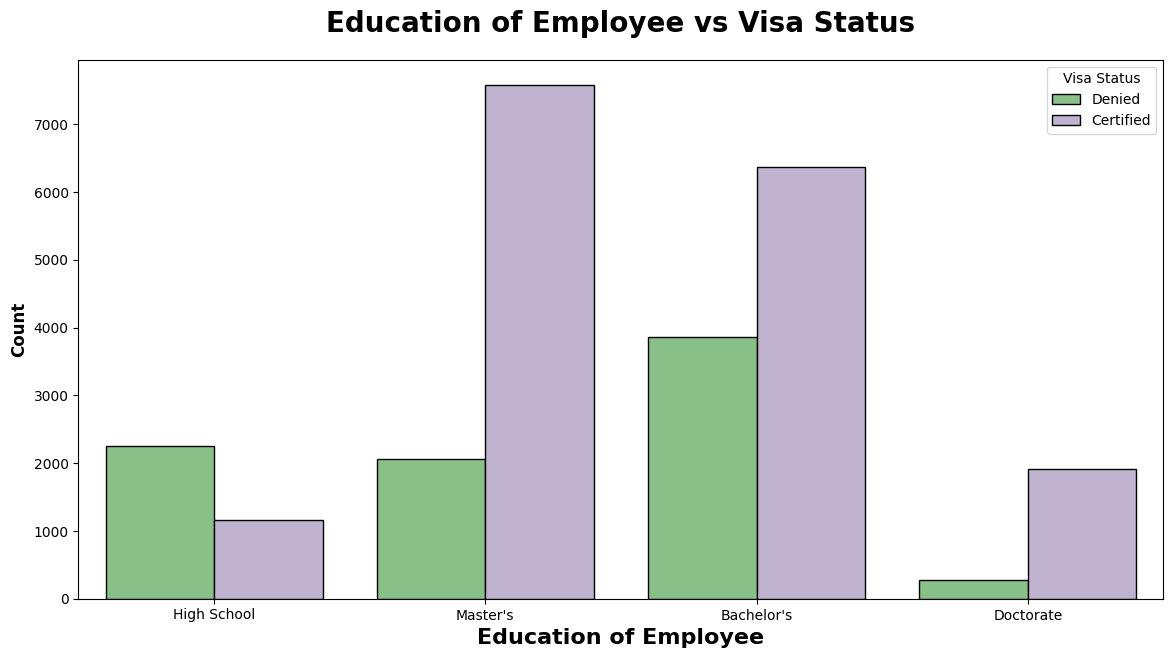

In [122]:
plt.subplots(figsize=(14,7))
sns.countplot(x="education_of_employee",hue="case_status", data=df, ec = "black",palette="Accent")
plt.title("Education of Employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Education of Employee", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

In [123]:
#group data by has_job_experience and count case_status
df.groupby('has_job_experience')['case_status'].value_counts(normalize=True).to_frame()*100


proportion
has_job_experience case_status            
N                  Certified     56.134108
                   Denied        43.865892
Y                  Certified     74.476422
                   Denied        25.523578

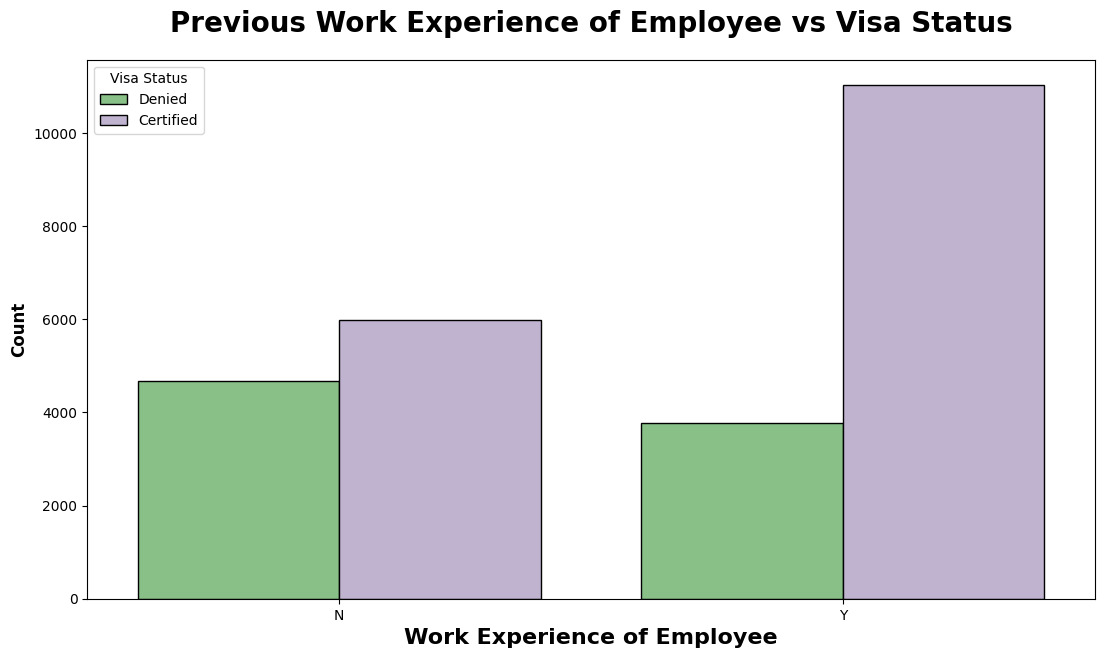

In [124]:
plt.subplots(figsize=(13,7))
sns.countplot(x="has_job_experience",hue="case_status", data=df, ec= "black",palette="Accent")
plt.title("Previous Work Experience of Employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Work Experience of Employee", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()


In [126]:
#group data by requires_job_training and count case_status
df.groupby('requires_job_training')['case_status'].value_counts(normalize=True).to_frame()

proportion
requires_job_training case_status            
N                     Certified      0.666459
                      Denied         0.333541
Y                     Certified      0.678849
                      Denied         0.321151

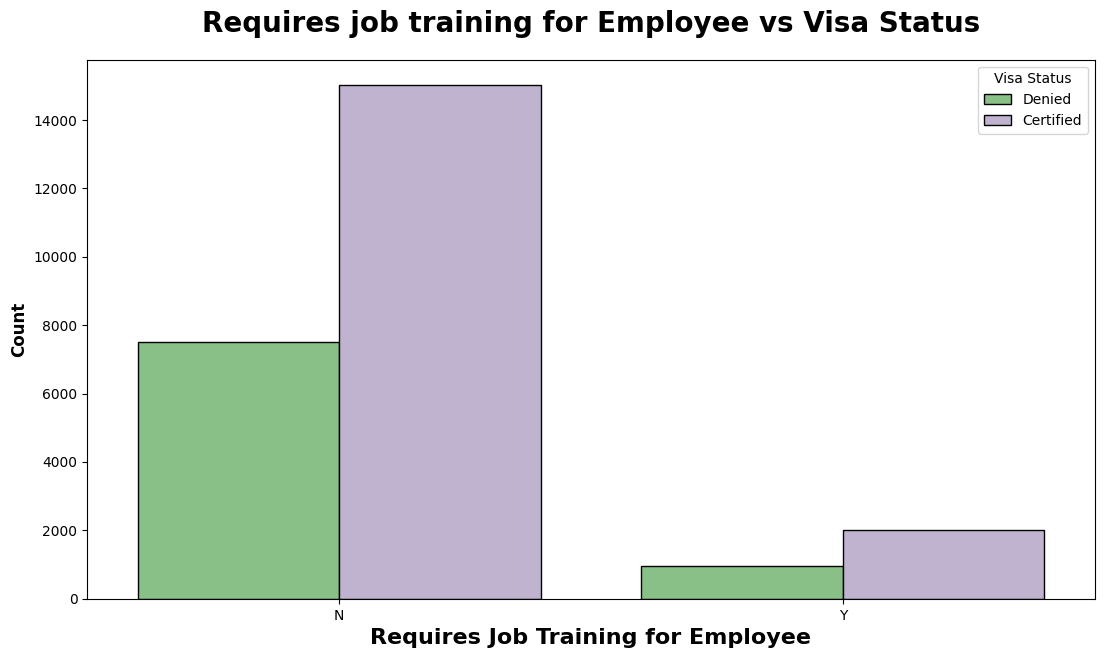

In [127]:
plt.subplots(figsize=(13,7))
sns.countplot(x="requires_job_training",hue="case_status", data=df, ec= "black",palette="Accent")
plt.title("Requires job training for Employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Requires Job Training for Employee", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()